<span style="font-size: 220%;color:#1155cc"> Pytorch: #4 [BikeSharing.csv] REGRESJA
    
    
<span style="font-size: 180%;color:red"> 20.09.2020   BEZ EMBEDDING
    
Work on diagnostic systems.
The tank prototype can really be checked in combat conditions!

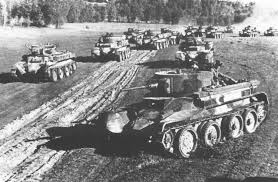
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Wed Nov 25 15:05:16 2020


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I import data

In [3]:
df = pd.read_csv('/home/wojciech/Pulpit/11/hour.csv')

def green(text):
     print('\033[32m', text, '\033[0m', sep='') 

green(df.dtypes)
print()
print()
print(df.shape)

df.head(4)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


# Spis zmiennych:

- <span style="font-size: 130%;color:#1155cc"> instant: </span>indeks rekordu
- <span style="font-size: 130%;color:#1155cc">dteday:</span> data
- <span style="font-size: 130%;color:#1155cc">season:</span> sezon (1: wiosenny, 2: lato, 3: jesień, 4: zima)
- <span style="font-size: 130%;color:#1155cc">yr:</span> rok (0: 2011, 1: 2012)
- <span style="font-size: 130%;color:#1155cc">mnth:</span> miesiąc (od 1 do 12)
- <span style="font-size: 130%;color:#1155cc">hr .: </span>godzina (od 0 do 23)
- <span style="font-size: 130%;color:#1155cc">holiday: </span>pogoda jest dniem świątecznym lub nie (pobrane z http://dchr.dc.gov/page/holiday-schedule)
- <span style="font-size: 130%;color:#1155cc">weekday: </span>dzień tygodnia
- <span style="font-size: 130%;color:#1155cc">workingday: </span>jeśli dzień nie jest ani weekendem, ani dniem wolnym od pracy wynosi 1, w przeciwnym razie wynosi 0.
+ <span style="font-size: 130%;color:#1155cc">weathersit:</span>
    - 1: Bezchmurnie, Niewiele chmur, Częściowe zachmurzenie, Częściowe zachmurzenie
    - 2: Mgła + Pochmurno, Mgła + Przerwane chmury, Mgła + Kilka chmur, Mgła
    - 3: lekki śnieg, lekki deszcz + burza z piorunami + rozproszone chmury, lekki deszcz + rozproszone chmury
    - 4: ulewny deszcz + lodowe palety + burza z piorunami + mgła, śnieg + mgła
- <span style="font-size: 130%;color:#1155cc">temp: </span>Znormalizowana temperatura w stopniach Celsjusza. Wartości są podzielone na 41 (maks.)
- <span style="font-size: 130%;color:#1155cc">atemp: </span>Znormalizowana temperatura odczuwania w stopniach Celsjusza. Wartości są podzielone na 50 (maks.)
- <span style="font-size: 130%;color:#1155cc">hum: </span>znormalizowana wilgotność. Wartości są podzielone na 100 (maks.)
- <span style="font-size: 130%;color:#1155cc">windspeed: </span>znormalizowana prędkość wiatru. Wartości są podzielone na 67 (maks.)
- <span style="font-size: 150%;background:#ff00ff"> casual:</span> liczba przypadkowych użytkowników
- <span style="font-size: 150%;background:#ff00ff">registered:</span> liczba zarejestrowanych użytkowników
- <span style="font-size: 130%;color:red">cnt: liczba wszystkich wypożyczonych rowerów, w tym zarówno zwykłych, jak i zarejestrowanych
    
    ![obraz.png](attachment:obraz.png)

<span style="font-size: 130%;color:#1155cc">Narzedzie do ograniczenia wielkości próby

In [4]:
df = df.sample(frac = 1.00, random_state=148)
df.shape

(17379, 17)

<span style="font-size: 110%;color:#1155cc"> Sprawdzam czy są braki w danych.

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<span style="font-size: 110%;color:#1155cc">Dane nie mają braków. Szukam czy nie ma błędów. Zmienne nie mają błędów.

In [6]:
df.agg(['min', 'max', 'mean', 'median'])

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.0,2011-01-01,1.00000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,17379.0,2012-12-31,4.00000,1.000000,12.000000,23.000000,1.00000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
mean,8690.0,NaN,2.50164,0.502561,6.537775,11.546752,0.02877,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
median,8690.0,NaN,3.00000,1.000000,7.000000,12.000000,0.00000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000


<span style="font-size: 110%;color:#1155cc"> Kasuje niepotrzebne dane


In [7]:
#del df['Unnamed: 0']
del df['dteday']

In [8]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cnt: count of total rental bikes including both casual and registered



I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

<span style="font-size: 220%;color:#1155cc"> Układ kolumn z danymi kategorycznymi i ciągłymi

In [9]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<span style="font-size: 150%;color:#1155cc"> Prosta wersja podziału na dyskretne i ciągłe

<span style="font-size: 150%;color:#1155cc"> Mojej produkcji podziału na dyskretne i ciągłe
    
    
Które z tych funkcji są kategoryczne?

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 24 unikalnych wartości

In [10]:
a,b = df.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(0,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
season --- int64 --- 4
yr --- int64 --- 2
mnth --- int64 --- 12
hr --- int64 --- 24
holiday --- int64 --- 2
weekday --- int64 --- 7
workingday --- int64 --- 2
weathersit --- int64 --- 4


In [11]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<span style="font-size: 150%;color:#1155cc"> Robie to ręcznie - może potem zrobie do tego automat
    
    Ręcznie przyporządkowuje kolumny do kategorii zmiennych dyskretnych (categorycznych) i zmiennych ciągłych (numerycznych)

In [12]:
categorical_columns = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
numerical_columns = ['temp','atemp','hum','windspeed']

In [13]:
df['hum'].value_counts()

0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.13      1
0.12      1
0.08      1
0.10      1
0.91      1
Name: hum, Length: 89, dtype: int64

<span style="font-size: 150%;color:#1155cc"> Wskazuje na zmienną wynikową

In [14]:
outputs = ['cnt']

### Digitization of text variables

In [15]:
df.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We need to convert types for qualitative columns to category. We can do this using the astype () function, as shown below:

<span style="font-size: 150%;color:#1155cc"> Zmieniam format zmiennych kategorycznych na type: 'category'</span>

In [16]:
for category in categorical_columns:
    df[category] = df[category].astype('category')

In [17]:
df.dtypes

instant          int64
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

<span style="font-size: 150%;color:#1155cc"> Cyfryzacja zmiennych kategorycznych</span>

### Why did we digitize data in the format?

Podstawowym celem oddzielania kolumn kategorialnych od kolumn liczbowych jest to, że wartości w kolumnie liczbowej mogą być bezpośrednio wprowadzane do sieci neuronowych. Jednak wartości kolumn skategoryzowanych należy najpierw przekonwertować na typ liczbowy.

In [18]:
categorical_columns

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

Variables: 'registered', 'casual' are also results only shown differently, therefore they must be removed from the data.

<span style="color:green"> Zmienne: 'registered','casual' są to też wyniki tylko inazej pokazane dlatego trzeba je usunąć z danych. 

In [19]:
print(df.dtypes)
df.head(3)

instant          int64
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9885,9886,1,1,2,22,0,2,1,2,0.34,0.3333,0.71,0.1940,3,97,100
7411,7412,4,0,11,10,0,4,1,2,0.44,0.4394,0.88,0.2239,17,100,117
15862,15863,4,1,10,3,0,0,0,2,0.50,0.4848,0.63,0.3284,18,61,79


### I'm cutting out an iron test reserve
<span style="font-size: 150%;color:#1155cc"> Wycinam żelazną rezerwę testową

Wycinam 0.5% procent ostatnich rekordów które będa słuzyły do sprawdzenia zdolności prognostycznych 

In [23]:
df5 = df[df.season==4]
df2 = df[df.season!=4]
print('Zbiór super testowy df5:',df5.shape)
print('df2:                    ',df2.shape) 

Zbiór super testowy df5: (4232, 16)
df2:                     (13147, 16)


### I specify what is X and what is y

<span style="font-size: 150%;color:#1155cc"> Określam co jest X a co y

In [24]:
df2.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [25]:
X = df2.drop(['cnt','registered','casual'],1)
y = df2['cnt']

In [26]:
X_SuperT = df5.drop(['cnt','registered','casual'],1)
y_SuperT = df5['cnt']

### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 0.0


In [28]:
y.value_counts()

5      189
6      184
4      180
2      178
3      175
      ... 
850      1
842      1
794      1
754      1
867      1
Name: cnt, Length: 835, dtype: int64

In [29]:
y = (y / 100)  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

1.81 1.86


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [30]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[ 0.4461, -1.2507,  0.9905, -1.1319,  1.5113, -0.1668, -0.5042,  0.6787,
          0.9301, -0.8832, -0.8820,  0.4885, -0.0187],
        [ 0.9743, -0.0237,  0.9905,  0.2842, -0.9484, -0.1668,  0.4929,  0.6787,
         -0.6469, -0.1992, -0.1385,  1.0505, -0.8685],
        [-0.7714,  1.2033, -1.0096,  0.2842, -0.9484, -0.1668, -0.5042,  0.6787,
          0.9301,  0.3872,  0.2747,  1.3570, -0.5047]], dtype=torch.float64)


In [31]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[ 0.4461, -1.2507,  0.9905, -1.1319,  1.5113, -0.1668, -0.5042,  0.6787,
          0.9301, -0.8832, -0.8820,  0.4885, -0.0187],
        [ 0.9743, -0.0237,  0.9905,  0.2842, -0.9484, -0.1668,  0.4929,  0.6787,
         -0.6469, -0.1992, -0.1385,  1.0505, -0.8685],
        [-0.7714,  1.2033, -1.0096,  0.2842, -0.9484, -0.1668, -0.5042,  0.6787,
          0.9301,  0.3872,  0.2747,  1.3570, -0.5047]])


In [32]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [33]:
y = torch.tensor(y)
print(y[:3])

tensor([1.0000, 0.3400, 0.2500], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [34]:
y = y.type(torch.FloatTensor)

In [35]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([13147, 13])
y: torch.Size([13147])


Dodanie jednego wymiaru do wektora wynikowego

In [ ]:
y = y.view(y.shape[0],1)
y.shape

### Podział na zbiór testowy i zbiór treningowy

In [ ]:
a,b = X.shape
a

total_records = a
test_records = int(a * .2)

X_train = X[:total_records-test_records]
X_test = X[total_records-test_records:total_records]

y_train = y[:total_records-test_records]
y_test = y[total_records-test_records:total_records]

In [ ]:
print('X_train: ',X_train.shape)
print('X_test:  ',X_test.shape)
print('----------------------------------------------------')
print('y_train: ',y_train.shape)
print('y_test:  ',y_test.shape)

## Defining the neural network
##### Programowanie torch.nn.Module

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

##### Definicja krztałtu sieci

In [ ]:
N, D_in = X.shape
N, D_out = y.shape

H = 100
device = torch.device('cpu')

In [ ]:
net = torch.nn.Sequential(
        torch.nn.Linear(D_in,  H),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, H),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, D_out),
    ).to(device)  

In [ ]:
net(X_train)

## Алгоритм оптимизации:

##### Optymalizator 
lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out

lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [ ]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.01, lambd=0.0001, alpha=0.15, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

## Определение функции потерь
to jest R2 dla regresji

In [ ]:
loss_func = torch.nn.MSELoss()

### Definiowanie procesu nauki i nauka

In [ ]:
inputs = X_train                          #1. deklarujemy x i y do nauki
outputs = y_train
for i in range(1000):                          #2. pętla 1000 powtórzeń (epok)
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 500 == 0:  
      print(i, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.



### There are many potential reasons. Most likely exploding gradients. The two things to try first:

- Normalize the inputs
- Lower the learning rate




### <span style="color:green">Istnieje wiele potencjalnych przyczyn. Najprawdopodobniej wybuchające gradienty. Dwie rzeczy do wypróbowania w pierwszej kolejności:

 - <span style="color:green">- Normalizuj wejścia
 - <span style="color:green">- Obniż tempo uczenia msię

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 
  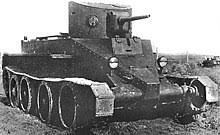

In [ ]:
with torch.no_grad():
    y_pred = net(X_test)  
    loss = (y_pred - y_test).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [ ]:
y_pred[:5]

### We save the whole model

<span style="font-size: 150%;background:#ffd966"> Zapisujemy cały model

In [ ]:
torch.save(net,'/home/wojciech/Pulpit/7/byk15.pb')

### We play the whole model
<span style="font-size: 150%;background:#ffd966"> Odtwarzamy cały model

In [ ]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk15.pb')
KOT.eval()

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

<span style="font-size: 150%;background:#ffd966">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="font-size: 100%;background:#ffd966"> Wybieramy sobie jakąś losowy rekord z tensora

In [ ]:
y_pred = y_pred*10
foka = y_pred.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_pred']
df11=np.round(df11.y_pred)
df11.head(3)

In [ ]:
y_test = y_test*10
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

In [ ]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

In [ ]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

In [ ]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_pred']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_pred')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_pred')

# Regression_Assessment

In [ ]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

In [ ]:
y = NOWA['y']
y_pred = NOWA['y_pred']

Regression_Assessment(y, y_pred)

# Танк Супер Тест в боевых условиях!

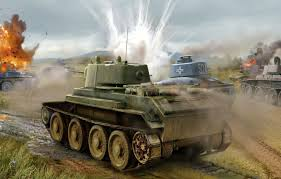

In [ ]:
print(X_SuperT.shape)
X_SuperT.head(3)

In [ ]:
y_SuperT.head(3)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_SuperT = sc.fit_transform(X_SuperT)

print(np.round(X_SuperT.std(), decimals=2), np.round(X_SuperT.mean(), decimals=2))

In [ ]:
X_SuperT = torch.tensor(X_SuperT)
X_SuperT = X_SuperT.type(torch.FloatTensor)
print(X_SuperT[:3])

In [ ]:
y_SuperT = (y_SuperT / 100)  # max test score is 100
#print(y.head(3))
print(np.round(y_SuperT.std(), decimals=2), np.round(y_SuperT.mean(), decimals=2))

In [ ]:
y_SuperT = y_SuperT.values
y_SuperT = torch.tensor(y_SuperT)
y_SuperT = y_SuperT.view(y_SuperT.shape[0],1)
y_SuperT.shape

In [ ]:
print('X_SuperT:',X_SuperT.shape)
print('y_SuperT:',y_SuperT.shape)

In [ ]:
with torch.no_grad():
    y_predST = net(X_SuperT)  
    loss = (y_predST - y_SuperT).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_predST = y_predST*100
foka = y_predST.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_predST']
df11=np.round(df11.y_predST)
df11.head(3)

In [ ]:
y_SuperT = y_SuperT*100
y_SuperT = np.round(y_SuperT)
foka = y_SuperT.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y_ST']
df_t.head(3)

In [ ]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

In [ ]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y_ST', 'y_predST']:
    ax.plot(Super_NOWA, label=ewa)
    
#ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_pred')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y_ST', y='y_predST')

In [ ]:
y = Super_NOWA['y_ST']
y_pred = Super_NOWA['y_predST']

Regression_Assessment(y, y_pred)

# Вышло плохо - методы устранения явления перенапряжения должны быть реализованы!
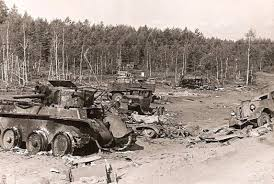

## Mean absolute error MAE i RMSE
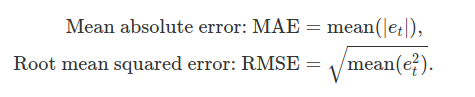

## Percentage errors MAPE



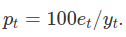

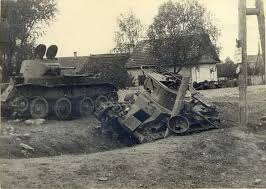
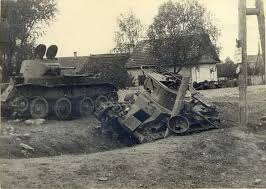